In [82]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

#prep
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MaxAbsScaler, QuantileTransformer

#models
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Ridge, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#validation libraries
from sklearn.cross_validation import KFold, StratifiedKFold
from IPython.display import display
from sklearn import metrics


%matplotlib inline

C:\Users\vaibv\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
astro = {
         'moon':    [5,4,np.nan,6,3,np.nan,6,7],
         'sun':     [5,4,5,6,3,1,6,7],
         'jupiter': [5,4,5,6,3,1,6,7],
         'mars':    [5,4,5,np.nan,3,1,None,7],
         'venus':   [5,4,5,6,3,1,6,7],
         'saturn':  [5,4,5,6,3,1,6,7],
         'mercury': [5,4,5,6,3,1,6,7],
         'rahu':    [None,4,5,6,None,1,6,7],
         'ketu':    [5,4,5,6,3,1,6,7],
         'gender':  ['m','f','f','m','m','f','m','f']
        }

astro_df = pd.DataFrame.from_dict(astro)

In [3]:
astro_df.shape

(8, 10)

In [4]:
astro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 10 columns):
moon       6 non-null float64
sun        8 non-null int64
jupiter    8 non-null int64
mars       6 non-null float64
venus      8 non-null int64
saturn     8 non-null int64
mercury    8 non-null int64
rahu       6 non-null float64
ketu       8 non-null int64
gender     8 non-null object
dtypes: float64(3), int64(6), object(1)
memory usage: 720.0+ bytes


In [5]:
astro_df.describe()

,moon,sun,jupiter,mars,venus,saturn,mercury,rahu,ketu
count,6.000000,8.00000,8.00000,6.000000,8.00000,8.00000,8.00000,6.000000,8.00000
mean,5.166667,4.62500,4.62500,4.166667,4.62500,4.62500,4.62500,4.833333,4.62500
std,1.471960,1.92261,1.92261,2.041241,1.92261,1.92261,1.92261,2.136976,1.92261
min,3.000000,1.00000,1.00000,1.000000,1.00000,1.00000,1.00000,1.000000,1.00000
25%,4.250000,3.75000,3.75000,3.250000,3.75000,3.75000,3.75000,4.250000,3.75000
50%,5.500000,5.00000,5.00000,4.500000,5.00000,5.00000,5.00000,5.500000,5.00000
75%,6.000000,6.00000,6.00000,5.000000,6.00000,6.00000,6.00000,6.000000,6.00000
max,7.000000,7.00000,7.00000,7.000000,7.00000,7.00000,7.00000,7.000000,7.00000


In [6]:
astro_df.describe(include = 'all')

,moon,sun,jupiter,mars,venus,saturn,mercury,rahu,ketu,gender
count,6.000000,8.00000,8.00000,6.000000,8.00000,8.00000,8.00000,6.000000,8.00000,8
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,m
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
mean,5.166667,4.62500,4.62500,4.166667,4.62500,4.62500,4.62500,4.833333,4.62500,NaN
std,1.471960,1.92261,1.92261,2.041241,1.92261,1.92261,1.92261,2.136976,1.92261,NaN
min,3.000000,1.00000,1.00000,1.000000,1.00000,1.00000,1.00000,1.000000,1.00000,NaN
25%,4.250000,3.75000,3.75000,3.250000,3.75000,3.75000,3.75000,4.250000,3.75000,NaN
50%,5.500000,5.00000,5.00000,4.500000,5.00000,5.00000,5.00000,5.500000,5.00000,NaN
75%,6.000000,6.00000,6.00000,5.000000,6.00000,6.00000,6.00000,6.000000,6.00000,NaN


In [7]:
astro_df.mean()
astro_df.mean(axis=1)
astro_df['moon'].mean()

astro_df.median()

astro_df.mode()

astro_df.std()

astro_df.var()

moon       2.166667
sun        3.696429
jupiter    3.696429
mars       4.166667
venus      3.696429
saturn     3.696429
mercury    3.696429
rahu       4.566667
ketu       3.696429
dtype: float64

In [8]:
#pd.merge(df1, df2, on='Customer_id', how='outer')
#pd.merge(df1, df2, on='Customer_id', how='left')
#pd.merge(df1, df2, on='Customer_id', how='inner')

In [9]:
astro_df.as_matrix()

C:\Users\vaibv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[5.0, 5, 5, 5.0, 5, 5, 5, nan, 5, 'm'],
       [4.0, 4, 4, 4.0, 4, 4, 4, 4.0, 4, 'f'],
       [nan, 5, 5, 5.0, 5, 5, 5, 5.0, 5, 'f'],
       [6.0, 6, 6, nan, 6, 6, 6, 6.0, 6, 'm'],
       [3.0, 3, 3, 3.0, 3, 3, 3, nan, 3, 'm'],
       [nan, 1, 1, 1.0, 1, 1, 1, 1.0, 1, 'f'],
       [6.0, 6, 6, nan, 6, 6, 6, 6.0, 6, 'm'],
       [7.0, 7, 7, 7.0, 7, 7, 7, 7.0, 7, 'f']], dtype=object)

In [10]:
astro_df.to_dense()

,moon,sun,jupiter,mars,venus,saturn,mercury,rahu,ketu,gender
0,5.0,5,5,5.0,5,5,5,NaN,5,m
1,4.0,4,4,4.0,4,4,4,4.0,4,f
2,NaN,5,5,5.0,5,5,5,5.0,5,f
3,6.0,6,6,NaN,6,6,6,6.0,6,m
4,3.0,3,3,3.0,3,3,3,NaN,3,m
5,NaN,1,1,1.0,1,1,1,1.0,1,f
6,6.0,6,6,NaN,6,6,6,6.0,6,m
7,7.0,7,7,7.0,7,7,7,7.0,7,f


In [11]:
astro_df[['moon','sun']]
type(astro_df[['moon','sun']])

pandas.core.frame.DataFrame

In [12]:
astro_df['moon']
type(astro_df['moon'])

pandas.core.series.Series

In [13]:
astro_df.iloc[range(3),]

,moon,sun,jupiter,mars,venus,saturn,mercury,rahu,ketu,gender
0,5.0,5,5,5.0,5,5,5,NaN,5,m
1,4.0,4,4,4.0,4,4,4,4.0,4,f
2,NaN,5,5,5.0,5,5,5,5.0,5,f


In [14]:
astro_df[astro_df['sun']>5]

,moon,sun,jupiter,mars,venus,saturn,mercury,rahu,ketu,gender
3,6.0,6,6,NaN,6,6,6,6.0,6,m
6,6.0,6,6,NaN,6,6,6,6.0,6,m
7,7.0,7,7,7.0,7,7,7,7.0,7,f


In [15]:
astro_df[astro_df['moon'].isin([6,5])]

,moon,sun,jupiter,mars,venus,saturn,mercury,rahu,ketu,gender
0,5.0,5,5,5.0,5,5,5,NaN,5,m
3,6.0,6,6,NaN,6,6,6,6.0,6,m
6,6.0,6,6,NaN,6,6,6,6.0,6,m


In [16]:
len(astro_df.columns)

10

In [17]:
astro_df.columns.values

array(['moon', 'sun', 'jupiter', 'mars', 'venus', 'saturn', 'mercury',
       'rahu', 'ketu', 'gender'], dtype=object)

In [18]:
len(astro_df)

8

In [19]:
#only Nan values are null
#''
astro_df[astro_df['rahu'].isnull()]

,moon,sun,jupiter,mars,venus,saturn,mercury,rahu,ketu,gender
0,5.0,5,5,5.0,5,5,5,NaN,5,m
4,3.0,3,3,3.0,3,3,3,NaN,3,m


In [20]:
astro_df[astro_df['moon'].isnull()]

,moon,sun,jupiter,mars,venus,saturn,mercury,rahu,ketu,gender
2,NaN,5,5,5.0,5,5,5,5.0,5,f
5,NaN,1,1,1.0,1,1,1,1.0,1,f


In [21]:
astro_df[astro_df['mars'].isnull()]

,moon,sun,jupiter,mars,venus,saturn,mercury,rahu,ketu,gender
3,6.0,6,6,NaN,6,6,6,6.0,6,m
6,6.0,6,6,NaN,6,6,6,6.0,6,m


In [22]:
sum(astro_df['moon'])
#sum(astro_df['mars'])
sum(astro_df['rahu'])

nan

In [23]:
astro_df[astro_df['moon'].isnull()]

,moon,sun,jupiter,mars,venus,saturn,mercury,rahu,ketu,gender
2,NaN,5,5,5.0,5,5,5,5.0,5,f
5,NaN,1,1,1.0,1,1,1,1.0,1,f


In [24]:
na_totals = astro_df.isnull().sum().sort_values(ascending=False)
na_totals[na_totals>0]

rahu    2
mars    2
moon    2
dtype: int64

In [25]:
astro_df.fillna(0, inplace=True)
astro_df

,moon,sun,jupiter,mars,venus,saturn,mercury,rahu,ketu,gender
0,5.0,5,5,5.0,5,5,5,0.0,5,m
1,4.0,4,4,4.0,4,4,4,4.0,4,f
2,0.0,5,5,5.0,5,5,5,5.0,5,f
3,6.0,6,6,0.0,6,6,6,6.0,6,m
4,3.0,3,3,3.0,3,3,3,0.0,3,m
5,0.0,1,1,1.0,1,1,1,1.0,1,f
6,6.0,6,6,0.0,6,6,6,6.0,6,m
7,7.0,7,7,7.0,7,7,7,7.0,7,f


In [26]:
numeric_cols = ['moon','sun','jupiter','mars','venus','saturn','mercury','rahu','ketu']
cat_cols = ['gender']

In [27]:
for col in numeric_cols:
    astro_df[col] = astro_df[col].astype(float)
    
for col in cat_cols:
    astro_df[col] = astro_df[col].astype('category')

In [28]:
astro_df['sun'] = astro_df['sun'].map(lambda x : x*x) 
astro_df['sun']

0    25.0
1    16.0
2    25.0
3    36.0
4     9.0
5     1.0
6    36.0
7    49.0
Name: sun, dtype: float64

In [29]:
astro_df['moon'] = astro_df['moon'].apply(lambda x : x*x) 
astro_df['moon']

0    25.0
1    16.0
2     0.0
3    36.0
4     9.0
5     0.0
6    36.0
7    49.0
Name: moon, dtype: float64

In [30]:
X = astro_df[numeric_cols]
X

,moon,sun,jupiter,mars,venus,saturn,mercury,rahu,ketu
0,25.0,25.0,5.0,5.0,5.0,5.0,5.0,0.0,5.0
1,16.0,16.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2,0.0,25.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,36.0,36.0,6.0,0.0,6.0,6.0,6.0,6.0,6.0
4,9.0,9.0,3.0,3.0,3.0,3.0,3.0,0.0,3.0
5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,36.0,36.0,6.0,0.0,6.0,6.0,6.0,6.0,6.0
7,49.0,49.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0


In [31]:
y = astro_df[cat_cols]
y

,gender
0,m
1,f
2,f
3,m
4,m
5,f
6,m
7,f


In [32]:
#Pandas: how to apply a function row - wise (example is adding strings)¶
#axis=0 - pass a column of data
#axis=1 - pass a row of data

In [33]:
X = X.apply(lambda x : x+1, axis = 1) 
X

,moon,sun,jupiter,mars,venus,saturn,mercury,rahu,ketu
0,26.0,26.0,6.0,6.0,6.0,6.0,6.0,1.0,6.0
1,17.0,17.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2,1.0,26.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
3,37.0,37.0,7.0,1.0,7.0,7.0,7.0,7.0,7.0
4,10.0,10.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0
5,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
6,37.0,37.0,7.0,1.0,7.0,7.0,7.0,7.0,7.0
7,50.0,50.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0


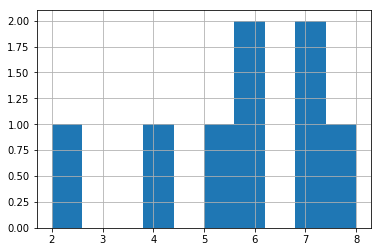

In [34]:
X['venus'].hist()

In [35]:
y['gender'] = y['gender'].map(lambda x : 1 if x == 'm' else 0) 
y['gender'] = y['gender'].astype('category')
y['gender']

C:\Users\vaibv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\vaibv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    1
1    0
2    0
3    1
4    1
5    0
6    1
7    0
Name: gender, dtype: category
Categories (2, int64): [0, 1]

In [36]:
def enigma(h):
    if h == 6.0 or h == 8.0 or h == 12.0:
        return 'cautious'
    else:
        return 'fine'
    
X['house'] = X['rahu'].map(enigma)
X

,moon,sun,jupiter,mars,venus,saturn,mercury,rahu,ketu,house
0,26.0,26.0,6.0,6.0,6.0,6.0,6.0,1.0,6.0,fine
1,17.0,17.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,fine
2,1.0,26.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,cautious
3,37.0,37.0,7.0,1.0,7.0,7.0,7.0,7.0,7.0,fine
4,10.0,10.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,fine
5,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,fine
6,37.0,37.0,7.0,1.0,7.0,7.0,7.0,7.0,7.0,fine
7,50.0,50.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,cautious


In [37]:
X['house'] = X['house'].astype('category')

In [38]:
## concatenating two different fields together in the same row
X['rahu*ketu'] = X.apply(lambda val : val['rahu'] * val['ketu'], axis=1)
X[['rahu*ketu','rahu','ketu']]

,rahu*ketu,rahu,ketu
0,6.0,1.0,6.0
1,25.0,5.0,5.0
2,36.0,6.0,6.0
3,49.0,7.0,7.0
4,4.0,1.0,4.0
5,4.0,2.0,2.0
6,49.0,7.0,7.0
7,64.0,8.0,8.0


In [39]:
#Apply on every element 
#Note that map can't be applied on every element
X.applymap(lambda x:x*2)

,moon,sun,jupiter,mars,venus,saturn,mercury,rahu,ketu,house,rahu*ketu
0,52.0,52.0,12.0,12.0,12.0,12.0,12.0,2.0,12.0,finefine,12.0
1,34.0,34.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,finefine,50.0
2,2.0,52.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,cautiouscautious,72.0
3,74.0,74.0,14.0,2.0,14.0,14.0,14.0,14.0,14.0,finefine,98.0
4,20.0,20.0,8.0,8.0,8.0,8.0,8.0,2.0,8.0,finefine,8.0
5,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,finefine,8.0
6,74.0,74.0,14.0,2.0,14.0,14.0,14.0,14.0,14.0,finefine,98.0
7,100.0,100.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,cautiouscautious,128.0


In [40]:
# reindex or change the order of rows
X.reindex([2, 1, 0,7,5,6,4,3])

columnsTitles = ['jupiter', 'ketu','mars', 'mercury','moon', 'rahu','saturn', 'sun', 'venus']
X.reindex(columns=columnsTitles)

,jupiter,ketu,mars,mercury,moon,rahu,saturn,sun,venus
0,6.0,6.0,6.0,6.0,26.0,1.0,6.0,26.0,6.0
1,5.0,5.0,5.0,5.0,17.0,5.0,5.0,17.0,5.0
2,6.0,6.0,6.0,6.0,1.0,6.0,6.0,26.0,6.0
3,7.0,7.0,1.0,7.0,37.0,7.0,7.0,37.0,7.0
4,4.0,4.0,4.0,4.0,10.0,1.0,4.0,10.0,4.0
5,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
6,7.0,7.0,1.0,7.0,37.0,7.0,7.0,37.0,7.0
7,8.0,8.0,8.0,8.0,50.0,8.0,8.0,50.0,8.0


In [41]:
"""
Pandas concat Vs append Vs join Vs merge

Concat gives the flexibility to join based on the axis( all rows or all columns)

Append is the specific case(axis=0, join='outer') of concat

Join is based on the indexes (set by set_index) on how variable =['left','right','inner','couter']

Merge is based on any particular column each of the two dataframes, this columns are variables on like 'left_on', 'right_on', 'on'
"""

"\nPandas concat Vs append Vs join Vs merge\n\nConcat gives the flexibility to join based on the axis( all rows or all columns)\n\nAppend is the specific case(axis=0, join='outer') of concat\n\nJoin is based on the indexes (set by set_index) on how variable =['left','right','inner','couter']\n\nMerge is based on any particular column each of the two dataframes, this columns are variables on like 'left_on', 'right_on', 'on'\n"

In [42]:
#Create a DataFrame
d = {
    'Name':['Alisa','Bobby','Cathrine','Madonna','Rocky','Sebastian','Jaqluine',
   'Rahul','David'],
   'Score1':[62,47,55,74,31,77,85,63,42],
   'Score2':[89,87,67,55,47,72,76,79,44],
   'Score3':[56,86,77,45,73,62,74,89,71]}
 
df1 = pd.DataFrame(d)

# create dataframe - df2
d = {
    'Name':['Andrew','Ajay','Teresa'],
   'Score1':[32,71,57],
   'Score2':[92,99,69],
   'Score3':[67,97,68]}
 
df2 = pd.DataFrame(d)

pd.concat([df1,df2])

,Name,Score1,Score2,Score3
0,Alisa,62,89,56
1,Bobby,47,87,86
2,Cathrine,55,67,77
3,Madonna,74,55,45
4,Rocky,31,47,73
5,Sebastian,77,72,62
6,Jaqluine,85,76,74
7,Rahul,63,79,89
8,David,42,44,71
0,Andrew,32,92,67


In [43]:
df1.append(df2)

,Name,Score1,Score2,Score3
0,Alisa,62,89,56
1,Bobby,47,87,86
2,Cathrine,55,67,77
3,Madonna,74,55,45
4,Rocky,31,47,73
5,Sebastian,77,72,62
6,Jaqluine,85,76,74
7,Rahul,63,79,89
8,David,42,44,71
0,Andrew,32,92,67


In [44]:
# create dataframe – df3
d = {
    'Name':['Jack','danny','vishwa'],
   'Score1':[32,71,70],
   'Score4':[72,91,89],
   'Score5':[57,72,78]}
 
df3 = pd.DataFrame(d)

pd.concat([df1,df3])

C:\Users\vaibv\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  # Remove the CWD from sys.path while we load stuff.


,Name,Score1,Score2,Score3,Score4,Score5
0,Alisa,62,89.0,56.0,NaN,NaN
1,Bobby,47,87.0,86.0,NaN,NaN
2,Cathrine,55,67.0,77.0,NaN,NaN
3,Madonna,74,55.0,45.0,NaN,NaN
4,Rocky,31,47.0,73.0,NaN,NaN
5,Sebastian,77,72.0,62.0,NaN,NaN
6,Jaqluine,85,76.0,74.0,NaN,NaN
7,Rahul,63,79.0,89.0,NaN,NaN
8,David,42,44.0,71.0,NaN,NaN
0,Jack,32,NaN,NaN,72.0,57.0


In [45]:
df1.append(df3)

C:\Users\vaibv\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,Name,Score1,Score2,Score3,Score4,Score5
0,Alisa,62,89.0,56.0,NaN,NaN
1,Bobby,47,87.0,86.0,NaN,NaN
2,Cathrine,55,67.0,77.0,NaN,NaN
3,Madonna,74,55.0,45.0,NaN,NaN
4,Rocky,31,47.0,73.0,NaN,NaN
5,Sebastian,77,72.0,62.0,NaN,NaN
6,Jaqluine,85,76.0,74.0,NaN,NaN
7,Rahul,63,79.0,89.0,NaN,NaN
8,David,42,44.0,71.0,NaN,NaN
0,Jack,32,NaN,NaN,72.0,57.0


In [46]:
#Create a DataFrame
 
d = {
'Name':['Alisa','Bobby','Cathrine','Madonna','Rocky','Sebastian','Jaqluine',
'Rahul','David'],
'Score1':[62,47,55,74,31,77,85,63,42],
'Score2':[89,87,67,55,47,72,76,79,44]}
 
df1 = pd.DataFrame(d)

#Create a DataFrame
d = {
'Score3':[56,86,77,45,73,62,74,89,71]}
 
df2 = pd.DataFrame(d)

pd.concat([df1, df2], axis=1, ignore_index=True)

,0,1,2,3
0,Alisa,62,89,56
1,Bobby,47,87,86
2,Cathrine,55,67,77
3,Madonna,74,55,45
4,Rocky,31,47,73
5,Sebastian,77,72,62
6,Jaqluine,85,76,74
7,Rahul,63,79,89
8,David,42,44,71


In [47]:
#Create a DataFrame
d = {
    'Name':['Alisa','Bobby','Cathrine','Madonna','Rocky','Sebastian','Jaqluine',
   'Rahul','David'],
   'Score1':[62,47,55,74,31,77,85,63,42],
   'Score2':[89,87,67,55,47,72,76,79,44]}
 
df = pd.DataFrame(d)

# assign new column to existing dataframe
df2=df.assign(Score3 = [56,86,77,45,73,62,74,89,71])
df2

,Name,Score1,Score2,Score3
0,Alisa,62,89,56
1,Bobby,47,87,86
2,Cathrine,55,67,77
3,Madonna,74,55,45
4,Rocky,31,47,73
5,Sebastian,77,72,62
6,Jaqluine,85,76,74
7,Rahul,63,79,89
8,David,42,44,71


In [48]:
#Create a DataFrame
d = {
    'Name':['Alisa','Bobby','Cathrine','Madonna','Rocky','Sebastian','Jaqluine',
   'Rahul','David'],
   'Score1':[62,47,55,74,31,77,85,63,42],
   'Score2':[89,87,67,55,47,72,76,79,44]}
 
df = pd.DataFrame(d)

df['Score3'] = [56,86,77,45,73,62,74,89,71]
df

,Name,Score1,Score2,Score3
0,Alisa,62,89,56
1,Bobby,47,87,86
2,Cathrine,55,67,77
3,Madonna,74,55,45
4,Rocky,31,47,73
5,Sebastian,77,72,62
6,Jaqluine,85,76,74
7,Rahul,63,79,89
8,David,42,44,71


In [49]:
#Create a DataFrame
d = {
    'Name':['Alisa','Bobby','Cathrine','Alisa','Bobby','Cathrine',
            'Alisa','Bobby','Cathrine','Alisa','Bobby','Cathrine'],
    'Exam':['Semester 1','Semester 1','Semester 1','Semester 1','Semester 1','Semester 1',
            'Semester 2','Semester 2','Semester 2','Semester 2','Semester 2','Semester 2'],
     
    'Subject':['Mathematics','Mathematics','Mathematics','Science','Science','Science',
               'Mathematics','Mathematics','Mathematics','Science','Science','Science'],
   'Score':[62,47,55,74,31,77,85,63,42,67,89,81]}
 
df = pd.DataFrame(d,columns=['Name','Exam','Subject','Score'])

In [50]:
# mean score of Students
 
df['Score'].groupby([df['Name']]).mean()

Name
Alisa       72.00
Bobby       57.50
Cathrine    63.75
Name: Score, dtype: float64

In [51]:
# sum of score group by Name and Exam
 
df['Score'].groupby([df['Name'],df['Exam']]).sum()

Name      Exam      
Alisa     Semester 1    136
          Semester 2    152
Bobby     Semester 1     78
          Semester 2    152
Cathrine  Semester 1    132
          Semester 2    123
Name: Score, dtype: int64

In [52]:
# group the entire dataframe by Subject and  Exam
 
df.groupby(['Subject', 'Exam']).sum()

Score
Subject     Exam             
Mathematics Semester 1    164
            Semester 2    190
Science     Semester 1    182
            Semester 2    237

In [53]:
# descriptive statistics by group - subject
 
df['Score'].groupby(df['Subject']).describe()

,count,mean,std,min,25%,50%,75%,max
Subject,,,,,,,,
Mathematics,6.0,59.000000,15.165751,42.0,49.00,58.5,62.75,85.0
Science,6.0,69.833333,20.380546,31.0,68.75,75.5,80.00,89.0


In [54]:
List2=['alex','zampa','micheal','jack','milton']

# sort the List2 by descending order of its length
List2.sort(reverse=True,key=len)
List2

['micheal', 'milton', 'zampa', 'alex', 'jack']

In [55]:
#Create a Dictionary of series
d = {'Name':pd.Series(['Alisa','Bobby','Cathrine','Madonna','Rocky','Sebastian','Jaqluine',
   'Rahul','David','Andrew','Ajay','Teresa']),
   'Age':pd.Series([26,27,25,24,31,27,25,33,42,32,51,47]),
   'Score':pd.Series([89,87,67,55,47,72,76,79,44,92,99,69])}
 
#Create a DataFrame
df = pd.DataFrame(d)

# sort the pandas dataframe by ascending value of single column
 
df.sort_values(by='Score')

,Name,Age,Score
8,David,42,44
4,Rocky,31,47
3,Madonna,24,55
2,Cathrine,25,67
11,Teresa,47,69
5,Sebastian,27,72
6,Jaqluine,25,76
7,Rahul,33,79
1,Bobby,27,87
0,Alisa,26,89


In [56]:
# sort the pandas dataframe by descending value of single column
 
df.sort_values(by='Score',ascending=0)

,Name,Age,Score
10,Ajay,51,99
9,Andrew,32,92
0,Alisa,26,89
1,Bobby,27,87
7,Rahul,33,79
6,Jaqluine,25,76
5,Sebastian,27,72
11,Teresa,47,69
2,Cathrine,25,67
3,Madonna,24,55


In [57]:
# sort the pandas dataframe by multiple columns
 
df.sort_values(by=['Age', 'Score'],ascending=[True,False])

,Name,Age,Score
3,Madonna,24,55
6,Jaqluine,25,76
2,Cathrine,25,67
0,Alisa,26,89
1,Bobby,27,87
5,Sebastian,27,72
4,Rocky,31,47
9,Andrew,32,92
7,Rahul,33,79
8,David,42,44


In [58]:
#Create a DataFrame
d = {
    'Name':['Alisa','Bobby','jodha','jack','raghu','Cathrine',
            'Alisa','Bobby','kumar','Alisa','Alex','Cathrine'],
    'Age':[26,24,23,22,23,24,26,24,22,23,24,24],
      
    'Score':[85,63,55,74,31,77,85,63,42,62,89,77]}
 
df = pd.DataFrame(d,columns=['Name','Age','Score'])

df.drop_duplicates()

,Name,Age,Score
0,Alisa,26,85
1,Bobby,24,63
2,jodha,23,55
3,jack,22,74
4,raghu,23,31
5,Cathrine,24,77
8,kumar,22,42
9,Alisa,23,62
10,Alex,24,89


In [59]:
# drop duplicate by a column name
 
df.drop_duplicates(['Name'], keep='last')

,Name,Age,Score
2,jodha,23,55
3,jack,22,74
4,raghu,23,31
7,Bobby,24,63
8,kumar,22,42
9,Alisa,23,62
10,Alex,24,89
11,Cathrine,24,77


In [60]:
#Create a DataFrame
d = {
    'Name':['Alisa','Bobby','jodha','jack','raghu','Cathrine',
            'Alisa','Bobby','kumar','Alisa','Alex','Cathrine'],
    'Age':[26,24,23,22,23,24,26,24,22,23,24,24],
      
       'Score':[85,63,55,74,31,77,85,63,42,62,89,77]}
 
df = pd.DataFrame(d,columns=['Name','Age','Score'])
df

,Name,Age,Score
0,Alisa,26,85
1,Bobby,24,63
2,jodha,23,55
3,jack,22,74
4,raghu,23,31
5,Cathrine,24,77
6,Alisa,26,85
7,Bobby,24,63
8,kumar,22,42
9,Alisa,23,62


In [61]:
#Create a DataFrame
d = {
    'Name':['Alisa','Bobby','jodha','jack','raghu','Cathrine',
            'Alisa','Bobby','kumar','Alisa','Alex','Cathrine'],
    'Age':[26,24,23,22,23,24,26,24,22,23,24,24],
      
       'Score':[85,63,55,74,31,77,85,63,42,62,89,77]}
 
df = pd.DataFrame(d,columns=['Name','Age','Score'])

df[df.Name != 'Alisa']

,Name,Age,Score
1,Bobby,24,63
2,jodha,23,55
3,jack,22,74
4,raghu,23,31
5,Cathrine,24,77
7,Bobby,24,63
8,kumar,22,42
10,Alex,24,89
11,Cathrine,24,77


In [62]:
df.drop('Age',axis=1)

,Name,Score
0,Alisa,85
1,Bobby,63
2,jodha,55
3,jack,74
4,raghu,31
5,Cathrine,77
6,Alisa,85
7,Bobby,63
8,kumar,42
9,Alisa,62


In [63]:
# get the row of max value
df.loc[df['Score'].idxmax()]

Name     Alex
Age        24
Score      89
Name: 10, dtype: object

In [64]:
ss = StandardScaler()
mas = MaxAbsScaler()
qs = QuantileTransformer()

astro_df['moon_norm'] = ss.fit_transform(astro_df[['moon']])
astro_df['moon_mas'] = mas.fit_transform(astro_df[['moon']])
astro_df['moon_qs'] = qs.fit_transform(astro_df[['moon']])


astro_df[['moon_norm','moon_mas','moon_qs', 'moon']]

,moon_norm,moon_mas,moon_qs,moon
0,0.213797,0.510204,5.714022e-01,25.0
1,-0.317009,0.326531,4.285433e-01,16.0
2,-1.260663,0.000000,1.000000e-07,0.0
3,0.862559,0.734694,7.857858e-01,36.0
4,-0.729858,0.183673,2.857767e-01,9.0
5,-1.260663,0.000000,1.000000e-07,0.0
6,0.862559,0.734694,7.857858e-01,36.0
7,1.629278,1.000000,9.999999e-01,49.0


In [65]:
astro_df['birth'] = ['day', 'day', 'night', 'evening', 'night', 'day', 'night', 'evening']

In [66]:
astro_df

,moon,sun,jupiter,mars,venus,saturn,mercury,rahu,ketu,gender,moon_norm,moon_mas,moon_qs,birth
0,25.0,25.0,5.0,5.0,5.0,5.0,5.0,0.0,5.0,m,0.213797,0.510204,5.714022e-01,day
1,16.0,16.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,f,-0.317009,0.326531,4.285433e-01,day
2,0.0,25.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,f,-1.260663,0.000000,1.000000e-07,night
3,36.0,36.0,6.0,0.0,6.0,6.0,6.0,6.0,6.0,m,0.862559,0.734694,7.857858e-01,evening
4,9.0,9.0,3.0,3.0,3.0,3.0,3.0,0.0,3.0,m,-0.729858,0.183673,2.857767e-01,night
5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,f,-1.260663,0.000000,1.000000e-07,day
6,36.0,36.0,6.0,0.0,6.0,6.0,6.0,6.0,6.0,m,0.862559,0.734694,7.857858e-01,night
7,49.0,49.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,f,1.629278,1.000000,9.999999e-01,evening


In [67]:
# one hot encoding
small_df = astro_df[['birth']].copy()
small_df['birth'] = small_df['birth'].astype('category')
small_df

,birth
0,day
1,day
2,night
3,evening
4,night
5,day
6,night
7,evening


In [68]:
pd.get_dummies(small_df)

,birth_day,birth_evening,birth_night
0,1,0,0
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1
5,1,0,0
6,0,0,1
7,0,1,0


In [86]:
linear = {
         'f1':        [ 2,  3,  4,  6,  8,  10,  12,  13, 15, 20, 24, 40, 65, 98 ],
         'response':  [30, 40, 50, 70, 90, 110, 130, 140,160,210,250,410,660,990 ]
        }

linear_df = pd.DataFrame.from_dict(linear)

In [87]:
def split_vals(a,n): return a[:n], a[n:]
n_valid = 4
n_trn = len(y)-n_valid
X_train, X_valid = split_vals(X, n_trn)
y_train, y_valid = split_vals(y, n_trn)

print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(3, 1) (4, 1) (3,) (4,)


In [88]:
lm = LinearRegression()
lm.fit(X_train,y_train)

lm.score(X_train, y_train)

1.0

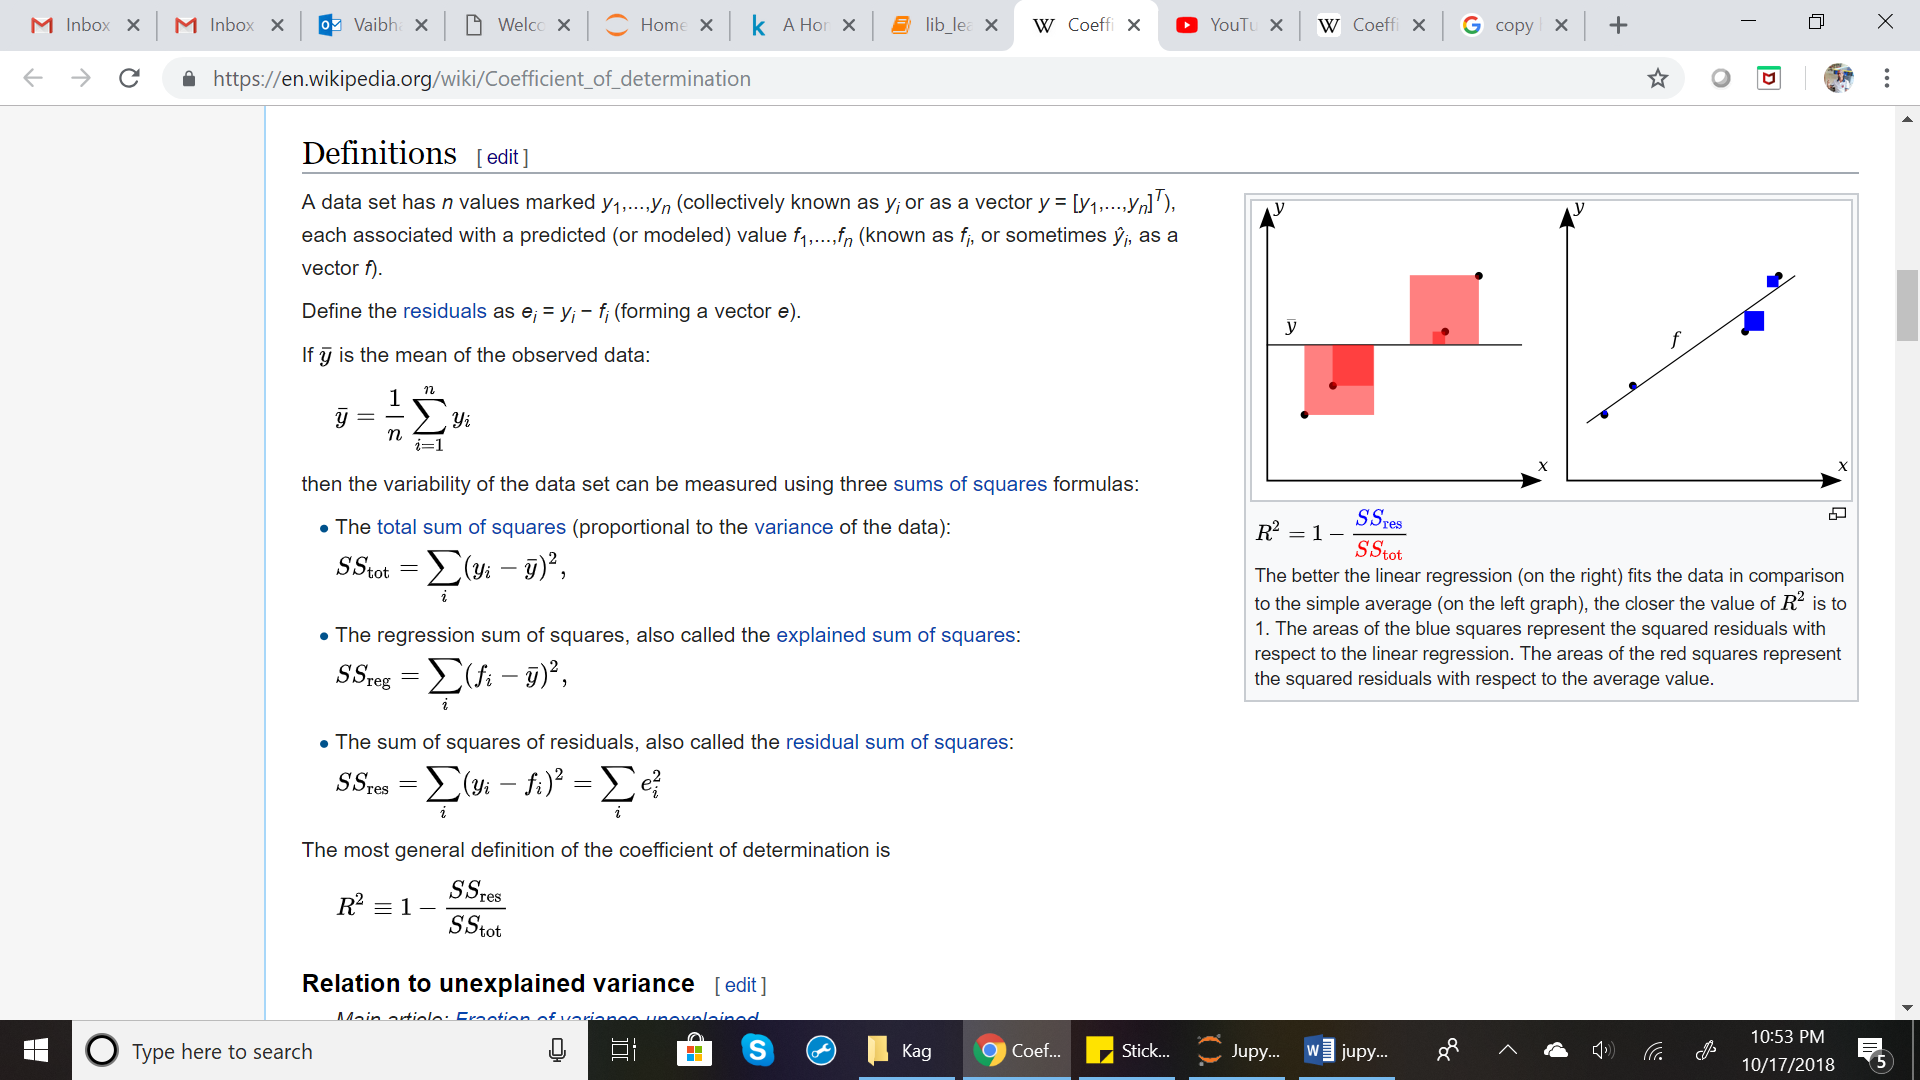

In [101]:
lm.score(X_valid, y_valid)

1.0

In [93]:
y_pred = lm.predict(X_valid)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

1.879919374704706e-14

In [97]:
list(y_pred)

[69.99999999999999, 89.99999999999999, 109.99999999999999, 129.99999999999997]

In [98]:
list(y_valid)

[70, 90, 110, 130]